### Density-based spatial clustering of applications with noise (DBSCAN)

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from IPython.display import display
from sklearn import metrics # for evaluations  
from sklearn.datasets import make_blobs, make_circles # for generating experimental data
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
from sklearn import preprocessing

# make matplotlib plot inline (Only in Ipython).
%matplotlib inline

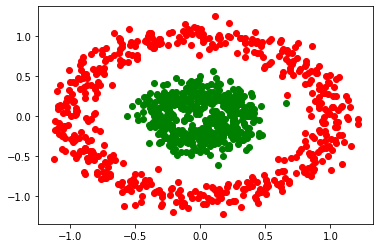

In [9]:
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Plot the data distribution. (Here's another way to plot scatter graph)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'ro')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'go')

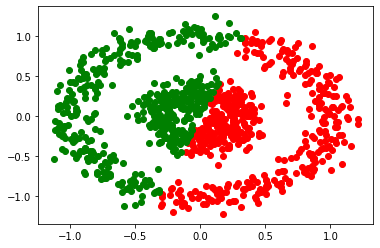

In [10]:
y_pred = KMeans(n_clusters=2, random_state=170).fit_predict(X)

# Plot the predictions.
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')

## DBSCAN: Density-Based Spatial Clustering of Applications with Noise

### Parameters
- $Eps$: Maximum radius of the neighborhood.
- $MinPts$: Minimum number of points in the Eps-neighborhood of a point.

### The Algorithm
1. Randomly choose a point $p$.
2. Retrieve all points density-reachable from $p$ w.r.t. $Eps$ and $MinPts$.
3. If $p$ is a core point, a cluster is formed.
4. If $p$ is a border point, no points are density-reachable from $p$, then visit the next point.
5. Repeat the process until all the data points have been processed.

In [11]:
def findNeighbours(data, i, eps):
    neighbours = []
    size = len(data)
    for j in range(0, size):
        val = math.sqrt(np.power(data[i]-data[j],2).sum()) #euclidean
        if (val < eps):
            neighbours.append(j)
    return neighbours

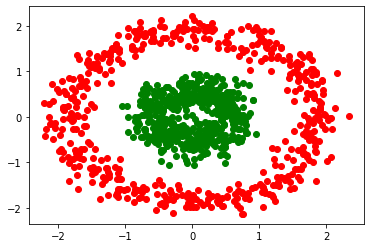

In [12]:
# Generate non-spherical data.
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Standardize features to zero mean and unit variance.
X = StandardScaler().fit_transform(X)

# Perform DBSCAN on the data
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

# Plot the data distribution. (Here's another way to plot scatter graph)
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')


In [13]:
def dbscan(data, eps, min_points):
    c_id = 1
    labels = [False]*len(data)
    size = len(data)
    for i in range(size):
        if (labels[i] == False):
            #Finding Neighbours within epsilon
            
            neighbourPts = findNeighbours(data, i, eps)
            if(len(neighbourPts) < min_points):
                labels[i] = -1 #outliar
            else:
                labels[i] = c_id
                #start growing cluster
    
                while len(neighbourPts) > 0:
                    curr_pt = neighbourPts[0]  #poping front datapoint from list
                    candidate_list = findNeighbours(data, curr_pt, eps)
                    
                    if len(candidate_list) >= min_points:
                        for j in range(0, len(candidate_list)):
                            check_pt = candidate_list[j]
                            if labels[check_pt] == False or labels[check_pt] == -1:
                                if labels[check_pt] == False:
                                    neighbourPts.append(check_pt)
                                labels[check_pt] = c_id
                    
                    neighbourPts = neighbourPts[1:]
                
                c_id = c_id + 1 
        else:
            continue
            
    return labels

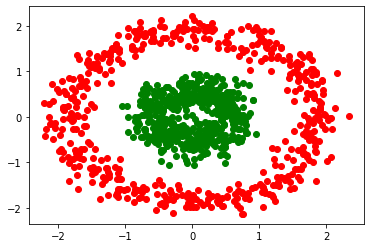

In [15]:
#applying implemented DBscan
labels = dbscan(X, 0.3, 10)
labels = np.array(labels)
labels = labels - 1
#print(labels)

# Plot the data distribution. (Here's another way to plot scatter graph)
#plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'ro')
#plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'go')

plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'ro')
plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'go')